# Import

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# set a palette for visualization
sns.set_palette('crest')

# Load the Data

In [23]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/DATA.csv')

In [24]:
# dataset head
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


# Data Cleaning and Preparation

In [25]:
# checking informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [26]:
# Drop the column 'unnamed: 5'
df = df.drop(['Unnamed: 5'], axis=1)

In [27]:
# Count the car brands
df['Car'].value_counts()

Mercedes      5
Ford          5
Skoda         4
Audi          3
BMW           3
Opel          3
Volvo         3
VW            1
Mitsubishi    1
Hyundai       1
Suzuki        1
Honda         1
Hundai        1
Mini          1
Fiat          1
Mazda         1
Toyota        1
Name: Car, dtype: int64

In [28]:
# change the wrong brand name (Hundai to Hyundai)
df.loc[df.Car=='Hundai','Car'] = 'Hyundai'

In [29]:
# concatenate brand and model
df['Car_Model'] = df.Car.astype(str) + ' ' + df.Model.astype(str)

In [30]:
# count the car models
df['Car_Model'].value_counts().head()

Ford Fiesta         2
Toyota Aygo         1
Audi A6             1
Opel Insignia       1
Mercedes C-Class    1
Name: Car_Model, dtype: int64

In [31]:
# check the values ​​to see if there is a duplicate
df[df.Car_Model=='Ford Fiesta']

,Car,Model,Volume,Weight,CO2,Car_Model
8,Ford,Fiesta,1500,1112,98,Ford Fiesta
12,Ford,Fiesta,1000,1112,99,Ford Fiesta


# Data Analysis & Visualization

In [32]:
# see descritive statistics
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


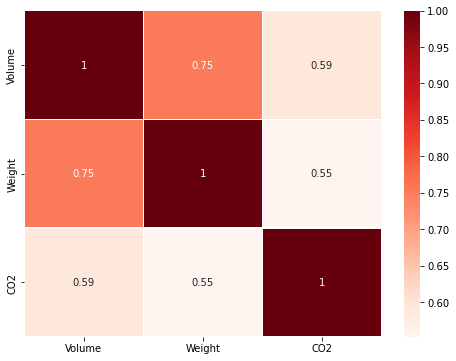

In [33]:
# correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='Reds',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

* Weight and Volume have a strong correlation (0.75 ≈ 0.8), as they are related to CO2 (0.59/0.55 ≈ 0.6).

The average values by brand:

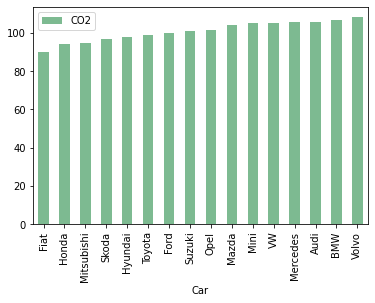

In [79]:
# Check the average values by CO2
df.groupby('Car').agg(np.mean).sort_values(by='CO2',ascending=True).plot.bar(y='CO2')

* The highest average emission comes from Volvo cars (2).
* The lowest average emission comes from the Fiat car.

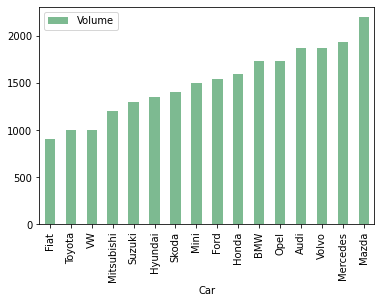

In [80]:
# Check the average values by Volume
df.groupby('Car').agg(np.mean).sort_values(by='Volume',ascending=True).plot.bar(y='Volume')

* The Mazda car have the highest average by volume, while the Fiat car has the lowest.


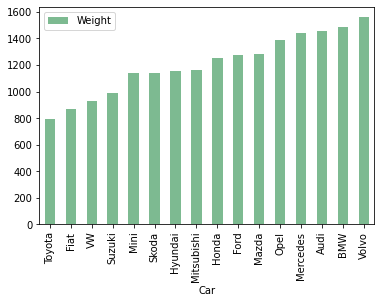

In [81]:
# Check the average values by Weight
df.groupby('Car').agg(np.mean).sort_values(by='Weight',ascending=True).plot.bar(y='Weight')

* Volvo cars have the highest average by weight, while the toyota car has the lowest.

<Figure size 648x720 with 0 Axes>

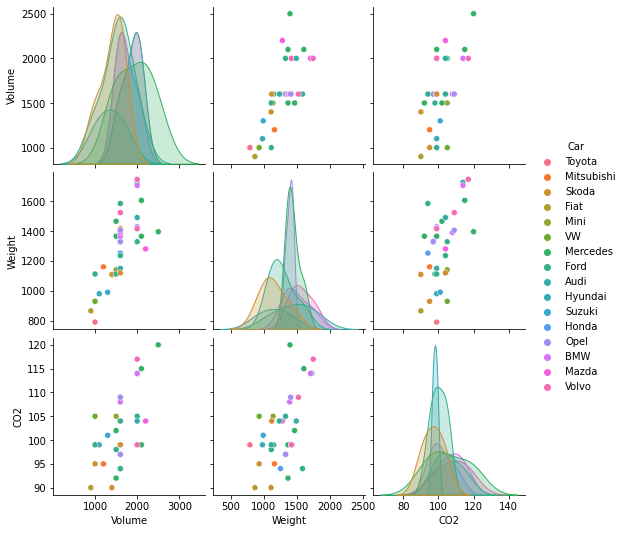

In [85]:
# overview by car brand
plt.figure(figsize=(9,10))
sns.pairplot(df, hue='Car')
plt.xticks(rotation=90)
plt.show()

* One of the Mercedes models has the highest CO2 emission and volume respectively.
* One of the Fiat models has the lowest CO2 emissions and volume respectively.

In [60]:
# Check the models that emit more CO2
df.nlargest(5, columns='CO2')

,Car,Model,Volume,Weight,CO2,Car_Model
35,Mercedes,SLK,2500,1395,120,Mercedes SLK
31,Volvo,XC70,2000,1746,117,Volvo XC70
30,Mercedes,E-Class,2100,1605,115,Mercedes E-Class
27,Audi,A6,2000,1725,114,Audi A6
29,BMW,5,2000,1705,114,BMW 5


* Highest volume cars appear to emit more CO2, which confirms the correlation between CO2 and volume.

These are the recommended cars:

In [94]:
# Check the models that emit less CO2
df.nsmallest(10, columns='CO2')

,Car,Model,Volume,Weight,CO2,Car_Model
3,Fiat,500,900,865,90,Fiat 500
6,Skoda,Fabia,1400,1109,90,Skoda Fabia
7,Mercedes,A-Class,1500,1365,92,Mercedes A-Class
13,Honda,Civic,1600,1252,94,Honda Civic
20,Ford,Mondeo,1600,1584,94,Ford Mondeo
1,Mitsubishi,Space Star,1200,1160,95,Mitsubishi Space Star
2,Skoda,Citigo,1000,929,95,Skoda Citigo
14,Hyundai,I30,1600,1326,97,Hyundai I30
15,Opel,Astra,1600,1330,97,Opel Astra
8,Ford,Fiesta,1500,1112,98,Ford Fiesta


* There are cars of different models, volumes and weights.